# Linear and Non-Linear Regression

# Index
1. Linear Regression with Tensorflow

  1.1 Data

  1.2 Optimal linear regression model using the Tensorflow

  1.3 Training

  1.4 Visualization    

2.  Non-Linear Regression with Tensorflow

  2.1 Data

  2.2 Optimal Non-Linear Regression Model using the Tensorflow

  2.3 Training

  2.4 Visualization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd/content/drive/MyDrive/Colab/study/metacode/creditcard/

/content/drive/MyDrive/Colab/study/metacode/creditcard


In [1]:
# Basic setting
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# tensorflow version 확인
print(tf.__version__)

2.17.0


# [1] Linear Regression with Tensorflow

## [1.1] Data

Generate random linear data

In [ ]:
np.random.seed(0) # 코드 여러 번 실행해도 동일한 난수 생성
X = np.random.rand(10000) * 100 # 0에서 100 사이의 균등 분포를 따르는 난수 10000개를 생성
Y = 2 * X + 1 + np.random.rand(10000) * 30 # Y = 2X + 1 + 약간의 noise(잡음) 추가

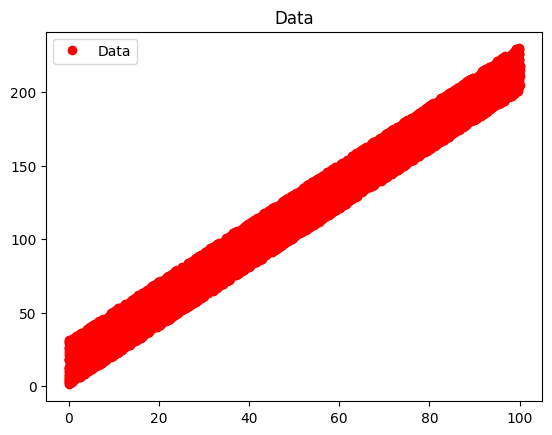

In [ ]:
# dataset 분포 시각화(visualization)
plt.plot(X, Y, 'ro', label = 'Data')

plt.legend() # 그래프에 레이블을 표시하는 범례 추가
plt.title('Data') # 그래프의 제목 설정
plt.show() # 그래프 출력

Split into training data, validation data, and test data

In [ ]:
# Use sklearn library
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

In [ ]:
# 데이터셋 크기 줄여서 정규화
X = X/100
Y = Y/100
# 학습 데이터, 검증 데이터와 테스트 데이터를 60:20:20 비율로 분할
X_train_full, X_test, Y_train_full, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_full, Y_train_full, test_size=0.25, random_state=42)

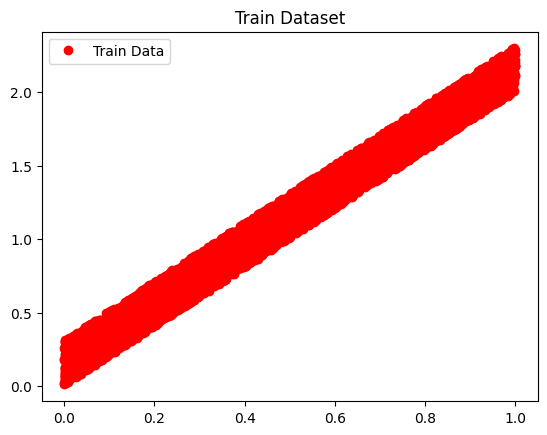

In [ ]:
# train dataset 시각화(visualization)
plt.plot(X_train, Y_train, 'ro', label = 'Train Data')

plt.legend()
plt.title('Train Dataset')
plt.show()

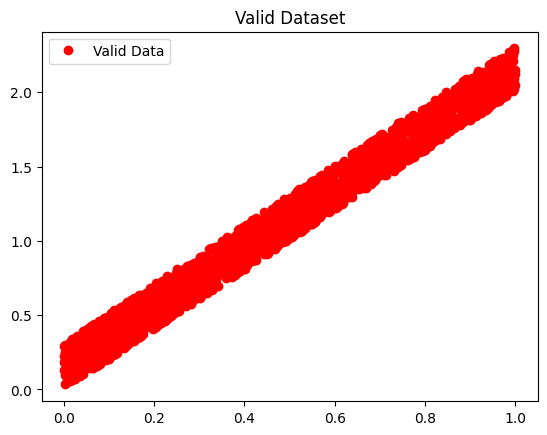

In [ ]:
# validation dataset 시각화(visualization)
plt.plot(X_val, Y_val, 'ro', label = 'Valid Data')

plt.legend()
plt.title('Valid Dataset')
plt.show()

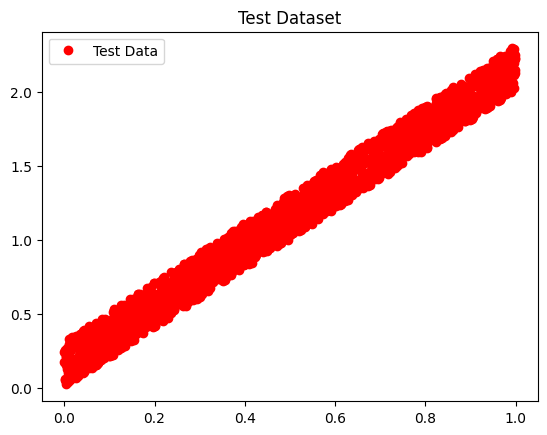

In [ ]:
# test dataset 시각화(visualization)
plt.plot(X_test, Y_test,'ro', label= 'Test Data')

plt.legend()
plt.title('Test Dataset')

plt.show()

## [1.2] Optimal linear regression model using the <font color=red>Tensorflow</font>

- 최적의 모델은 모든 데이터에 대해 실제값과 예측값의 차이가 제일 작은 모델
- 선형 회귀 모델은  일반적으로 <font color=red>MSE(Mean Squared Error)</font> 손실을 최소화하도록 학습

**MSE 손실 함수**
\begin{equation*}
\left( \frac{1}{n} \sum_{i=1}^n (y_i - (wX_i + b))^2 \right)
\end{equation*}

**Gradients 계산**
\begin{equation*}
\frac{\partial L}{\partial w} = -2 * \frac{1}{n} \sum_{i=1}^n (y_i - (wX_i + b)) * X_i
\end{equation*}

\begin{equation*}
\frac{\partial L}{\partial b} = -2 * \frac{1}{n} \sum_{i=1}^n (y_i - (wX_i + b))
\end{equation*}

In [ ]:
# Model weights and bias parameters 초기화
W = tf.Variable(tf.random.normal([1], stddev=0.1), name='weight')
b = tf.Variable(tf.random.normal([1], stddev=0.1), name='bias')

In [ ]:
# 선형(이라고 가정) 함수 설정
def hypothesis(x):
  return W * x + b

In [ ]:
# 손실 함수(loss func) 정의
def loss_fn(y_pred, y_true):
  return tf.reduce_mean(tf.square(y_pred - y_true)) # MSE loss

In [ ]:
# 확률적 경사 하강법(stochastic gradient descent) 알고리즘
optimize = tf.optimizers.SGD(learning_rate = 0.01)

In [ ]:
# 학습 함수 정의
def train(X, Y):

  with tf.GradientTape() as g: # 자동 미분을 수행하는 도구
    pred = hypothesis(X) # 예측값 계산
    loss = loss_fn(pred, Y) # 손실 함수 계산

  gradients = g.gradient(loss, [W, b]) # gradient 계산
  optimize.apply_gradients(zip(gradients, [W, b])) # W와 b 업데이트

  return loss

## [1.3] Training

In [ ]:
# traing setting
epochs = 4001

# for visualize change of loss
train_losses = []
val_losses = []

for epoch in range(epochs):
  # training
  train_loss = train(X_train, Y_train)
  train_losses.append(train_loss.numpy())

  # validation
  val_pred = hypothesis(X_val)
  val_loss = loss_fn(val_pred, Y_val)
  val_losses.append(val_loss.numpy())

  # display
  if epoch % 100 == 0:
    print(f"Epoch {epoch + 1}, Training Loss: {train_loss.numpy():.6f}, Validation Loss: {val_loss.numpy():.6f}, W: {W.numpy()}, b: {b.numpy()}")


Epoch 1, Training Loss: 1.964269, Validation Loss: 1.904493, W: [-0.12493007], b: [-0.01023187]
Epoch 101, Training Loss: 0.183570, Validation Loss: 0.182469, W: [0.567398], b: [0.8180617]
Epoch 201, Training Loss: 0.134531, Validation Loss: 0.133210, W: [0.77911776], b: [0.7986318]
Epoch 301, Training Loss: 0.104860, Validation Loss: 0.103759, W: [0.93388456], b: [0.7238435]
Epoch 401, Training Loss: 0.082163, Validation Loss: 0.081276, W: [1.0670161], b: [0.65387976]
Epoch 501, Training Loss: 0.064763, Validation Loss: 0.064050, W: [1.1833965], b: [0.5922746]
Epoch 601, Training Loss: 0.051424, Validation Loss: 0.050850, W: [1.2852795], b: [0.53830904]
Epoch 701, Training Loss: 0.041199, Validation Loss: 0.040736, W: [1.3744816], b: [0.49105752]
Epoch 801, Training Loss: 0.033361, Validation Loss: 0.032987, W: [1.4525828], b: [0.449686]
Epoch 901, Training Loss: 0.027352, Validation Loss: 0.027050, W: [1.5209646], b: [0.41346306]
Epoch 1001, Training Loss: 0.022745, Validation Loss: 

## [1.4] Visualization

Visualizing learning outcomes

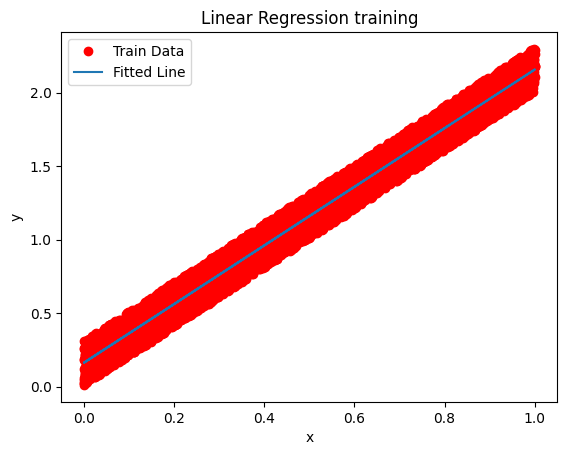

In [ ]:
# Visualize the trained linear regression model
plt.plot(X_train, Y_train, 'ro', label= 'Train Data')
plt.plot(X_train, np.array(W.numpy() * X_train + b.numpy()), label = 'Fitted Line')

plt.legend()
plt.title('Linear Regression training')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

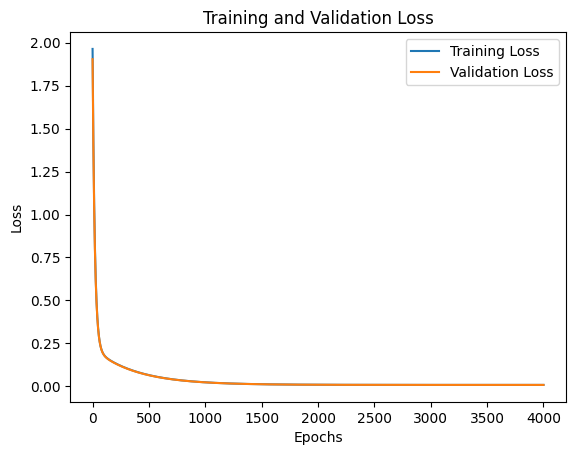

In [ ]:
# Visualize the change of training loss and validation loss
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.plot(range(epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

Test visualization

In [ ]:
# 테스트 데이터로 최종 평가
test_pred = hypothesis(X_test)
test_loss = loss_fn(test_pred, Y_test)
print('\nTest Loss for LinearRegression model : %.6f' % test_loss)


Test Loss for LinearRegression model : 0.007685


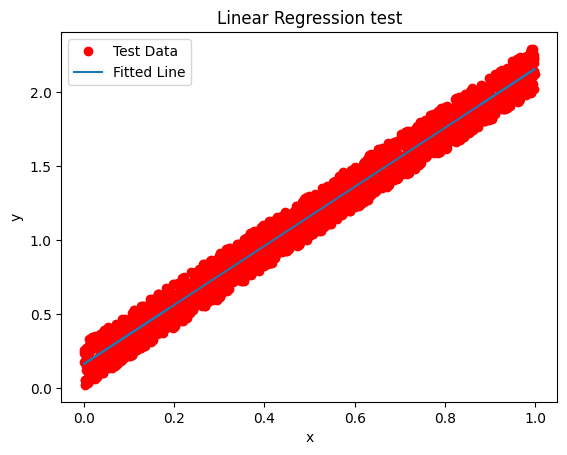

In [ ]:
# Vizualize test
plt.plot(X_test,Y_test,'ro',label = 'Test Data')
plt.plot(X_test, np.array(W.numpy() * X_test + b.numpy()),label = 'Fitted Line')

plt.legend()
plt.title('Linear Regression test')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# [2] Non-Linear Regression with Tensorflow

y = a*x^2 + b*x + c

## [2.1] Data

Generate random non - linear data

In [2]:
a = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
c = tf.Variable(tf.random.normal([1]))

print(a.numpy())
print(b.numpy())
print(c.numpy())

[0.5685668]
[-1.3153679]
[-0.8383197]


In [3]:
X = tf.random.normal([50])
Y = X**2 + X*tf.random.normal([50])

In [4]:
X = X.numpy()
Y = Y.numpy()

Data visualization

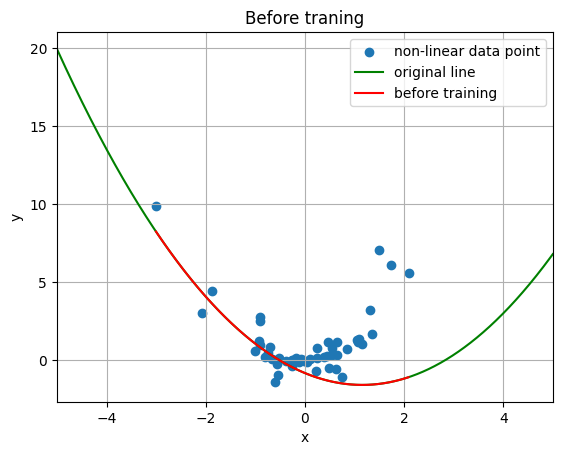

In [5]:
line_x = np.arange(min(X), max(X), 0.001)
line_y = a*(line_x)**2 + b*(line_x) + c

x_ = np.arange(-5., 5., 0.001)
y_ = a*(x_)**2 + b*(x_) + c

plt.scatter(X, Y, label = "non-linear data point")
plt.plot(x_, y_, "g", label = "original line")
plt.plot(line_x, line_y, "r", label = "before training")
plt.legend()
plt.grid()
plt.title("Before traning")
plt.xlim(-5. , 5.)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## [2.2] Optimal Non-Linear Regression Model using the Tensorflow

In [6]:
def hypothesis(x):
  return a*(x)**2 + b*x + c

def cost_fn(pred_y, true_y):
  return tf.reduce_mean(tf.square(pred_y - true_y))

optimizer = tf.optimizers.Adam(learning_rate = 0.01)

def train():
  with tf.GradientTape() as g:
    pred = hypothesis(X)
    cost = cost_fn(pred, Y)

  gradients = g.gradient(cost, [a,b,c])                    # 기울기를 계산하는 부분
  optimizer.apply_gradients(zip(gradients, [a,b,c]))       # 계산된 기울기를 업데이트 해주는 부분

## [2.3] Training

In [7]:
for step in range(1,1001):
  train()

  if step % 100 == 0:
    pred = hypothesis(X)
    cost = cost_fn(pred, Y)
    print(f" step:{step} cost:{cost:.4f} a:{a.numpy()} b:{b.numpy()} c:{c.numpy()} ")
    line_x = np.arange(min(X), max(X), 0.001)
    line_y = a*(line_x)**2 + b*(line_x) + c

 step:100 cost:1.5227 a:[1.1738483] b:[-0.4120043] c:[-0.15229729] 
 step:200 cost:0.9777 a:[1.2193718] b:[0.12127057] c:[-0.04315561] 
 step:300 cost:0.9103 a:[1.2557366] b:[0.33179858] c:[-0.07058007] 
 step:400 cost:0.9046 a:[1.2746067] b:[0.39348006] c:[-0.09966688] 
 step:500 cost:0.9043 a:[1.2802888] b:[0.40763095] c:[-0.10979508] 
 step:600 cost:0.9043 a:[1.281424] b:[0.41018105] c:[-0.11190472] 
 step:700 cost:0.9043 a:[1.2815832] b:[0.4105286] c:[-0.11220296] 
 step:800 cost:0.9043 a:[1.2815986] b:[0.41056278] c:[-0.11223253] 
 step:900 cost:0.9043 a:[1.2815992] b:[0.4105646] c:[-0.1122339] 
 step:1000 cost:0.9043 a:[1.2815992] b:[0.4105646] c:[-0.1122339] 


## [2.4] Visualization

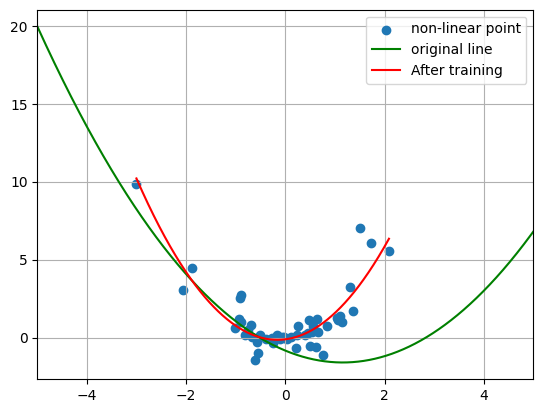

In [8]:
line_x = np.arange(min(X), max(X), 0.001)
line_y = a*(line_x)**2 + b*(line_x) + c

plt.scatter(X,Y, label = "non-linear point")
plt.plot(x_,y_, 'g', label = "original line")
plt.plot(line_x, line_y, 'r', label = "After training")
plt.legend()
plt.xlim(-5., 5)
plt.grid()
plt.show()